## 1. Load the Mall Customer Dataset 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import plotly.express as px
import plotly.graph_objects as go

# Data Load
df = pd.read_csv('data.csv')

print("5 baris pertama dataset:")
df.head()

5 baris pertama dataset:


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## 2. Basic Data Exploration 

In [27]:
# Menampilkan informasi umum dataset
print("Informasi Dataset:")
df.info()

print("\nDataset Shape:", df.shape)

# Mengecek data yang hilang
print("\nMissing Values:")
missing_values = df.isnull().sum()
print(missing_values)

# Membuat ringkasan statistik deskriptif
print("\nStatistik Deskriptif:")
df.describe()

Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
 5   Cluster                 200 non-null    int32 
dtypes: int32(1), int64(4), object(1)
memory usage: 8.7+ KB

Dataset Shape: (200, 6)

Missing Values:
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
Cluster                   0
dtype: int64

Statistik Deskriptif:


,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Cluster
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000,2.195000
std,57.879185,13.969007,26.264721,25.823522,1.332612
min,1.000000,18.000000,15.000000,1.000000,0.000000
25%,50.750000,28.750000,41.500000,34.750000,1.000000
50%,100.500000,36.000000,61.500000,50.000000,2.000000
75%,150.250000,49.000000,78.000000,73.000000,3.000000
max,200.000000,70.000000,137.000000,99.000000,4.000000


## 3. Data Visualization - Age Distribution 

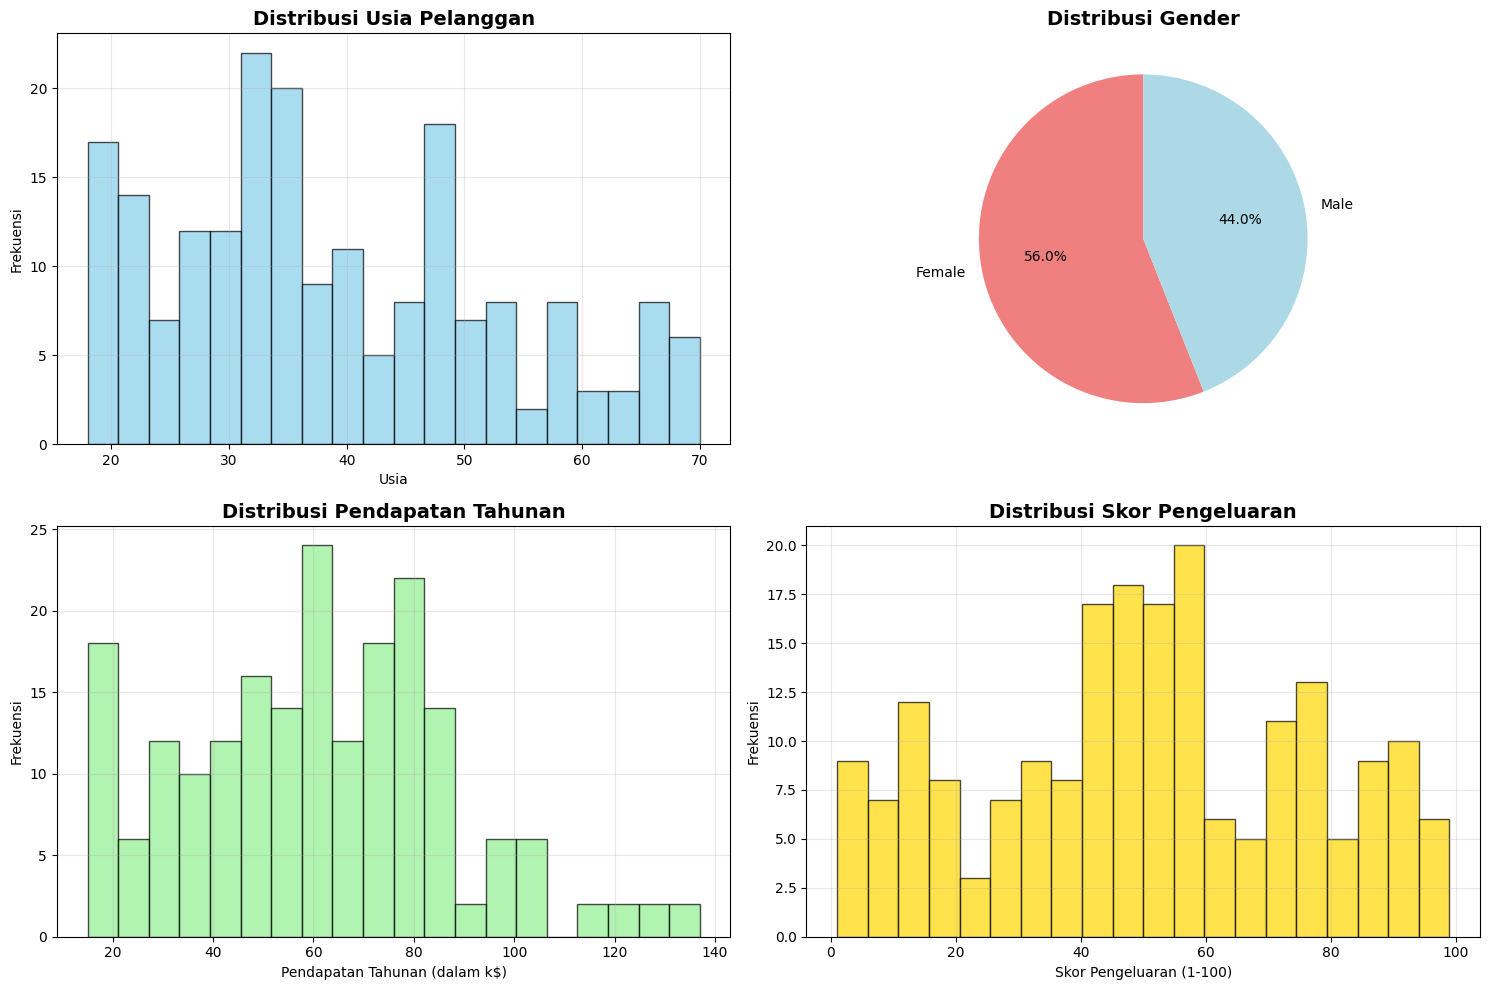

Wawasan Utama:
• Total pelanggan: 200
• Rentang usia: 18 - 70 tahun
• Rata-rata usia: 38.9 tahun
• Pembagian gender: 112 Perempuan, 88 Laki-laki
• Rentang pendapatan: $15k - $137k
• Rentang skor pengeluaran: 1 - 99


In [ ]:
plt.style.use('default')
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Histogram Distribusi Usia Pelanggan
axes[0, 0].hist(df['Age'], bins=20, color='skyblue', alpha=0.7, edgecolor='black')
axes[0, 0].set_title('Distribusi Usia Pelanggan', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Usia')
axes[0, 0].set_ylabel('Frekuensi')
axes[0, 0].grid(True, alpha=0.3)

# Pie Chart Distribusi Gender
gender_counts = df['Gender'].value_counts()
axes[0, 1].pie(gender_counts.values, labels=gender_counts.index, autopct='%1.1f%%', 
               colors=['lightcoral', 'lightblue'], startangle=90)
axes[0, 1].set_title('Distribusi Gender', fontsize=14, fontweight='bold')

# Histogram Distribusi Pendapatan Tahunan
axes[1, 0].hist(df['Annual Income (k$)'], bins=20, color='lightgreen', alpha=0.7, edgecolor='black')
axes[1, 0].set_title('Distribusi Pendapatan Tahunan', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Pendapatan Tahunan (dalam k$)')
axes[1, 0].set_ylabel('Frekuensi')
axes[1, 0].grid(True, alpha=0.3)

# Histogram Distribusi Skor Pengeluaran
axes[1, 1].hist(df['Spending Score (1-100)'], bins=20, color='gold', alpha=0.7, edgecolor='black')
axes[1, 1].set_title('Distribusi Skor Pengeluaran', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Skor Pengeluaran (1-100)')
axes[1, 1].set_ylabel('Frekuensi')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Menampilkan insight dari data
print("Wawasan Utama:")
print(f"• Total pelanggan: {len(df)}")
print(f"• Rentang usia: {df['Age'].min()} - {df['Age'].max()} tahun")
print(f"• Rata-rata usia: {df['Age'].mean():.1f} tahun")
print(f"• Pembagian gender: {gender_counts['Female']} Perempuan, {gender_counts['Male']} Laki-laki")
print(f"• Rentang pendapatan: ${df['Annual Income (k$)'].min()}k - ${df['Annual Income (k$)'].max()}k")
print(f"• Rentang skor pengeluaran: {df['Spending Score (1-100)'].min()} - {df['Spending Score (1-100)'].max()}")

**Interpretasi Hasil**
- Distribusi Usia: Mayoritas pelanggan berada dalam rentang usia 20-40 tahun.
- Distribusi Gender: Terdapat lebih banyak pelanggan perempuan (56%) dibandingkan laki-laki (44%).
- Distribusi Pendapatan: Pendapatan pelanggan paling banyak terkonsentrasi di sekitar $50k - $80k per tahun.
- Skor Pengeluaran: Distribusi skor pengeluaran menunjukkan dua puncak, satu di sekitar 40-60 dan satu lagi di rentang skor tinggi (di atas 70) mengindikasikan adanya kelompok-kelompok perilaku belanja yang berbeda.

## 4. Data Normalization

Bentuk data asli: (200, 3)

Data asli (5 baris pertama):
   Age  Annual Income (k$)  Spending Score (1-100)
0   19                  15                      39
1   21                  15                      81
2   20                  16                       6
3   23                  16                      77
4   31                  17                      40
Hasil MinMaxScaler (rentang 0-1):
        Age  Annual Income (k$)  Spending Score (1-100)
0  0.019231            0.000000                0.387755
1  0.057692            0.000000                0.816327
2  0.038462            0.008197                0.051020
3  0.096154            0.008197                0.775510
4  0.250000            0.016393                0.397959

Statistik setelah MinMaxScaler:
              Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000          200.000000              200.000000
mean     0.400962            0.373443                0.502041
std      0.268635            0.215285           

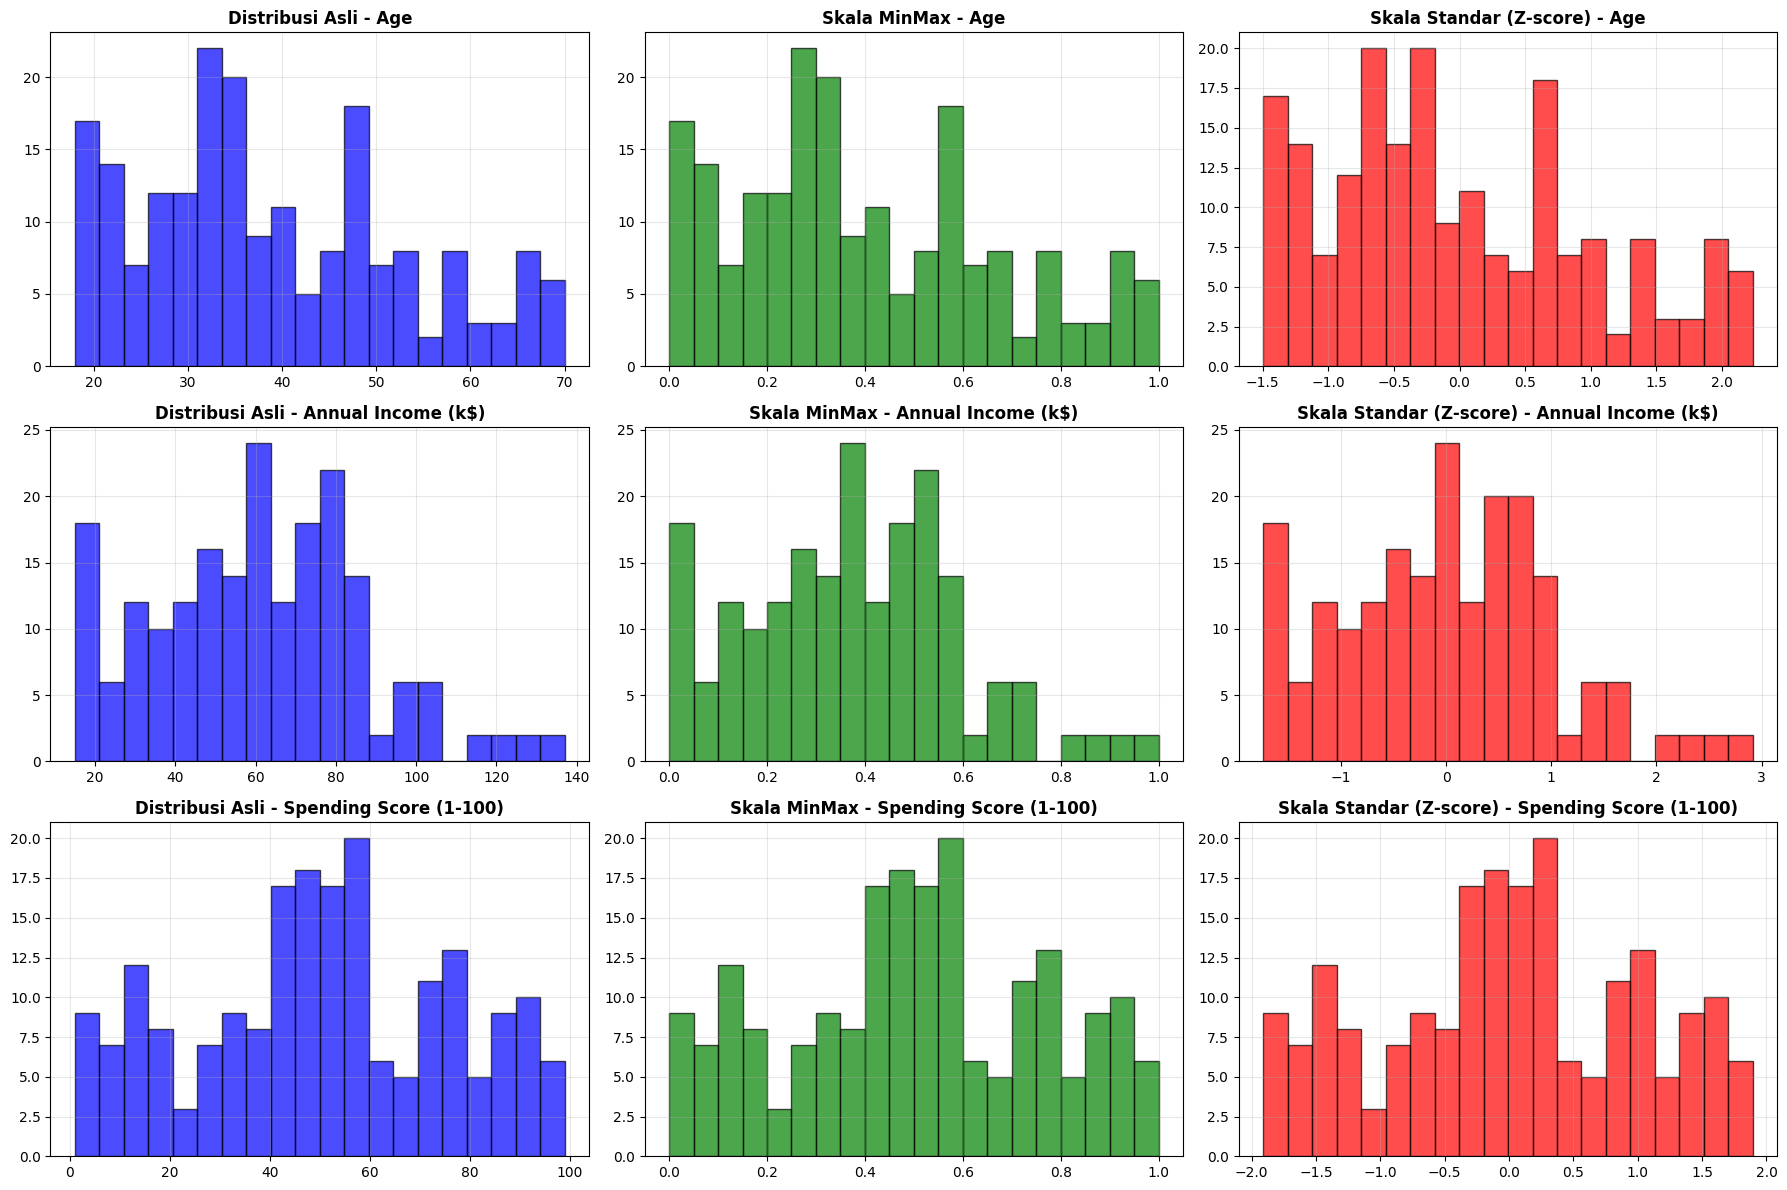


Untuk proses clustering K-Means, akan digunakan hasil dari StandardScaler.
Bentuk dataframe setelah normalisasi: (200, 6)


In [ ]:
# Data Prep
numerical_features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
print("Bentuk data asli:", df[numerical_features].shape)
# Menampilkan 5 baris pertama dari data asli sebagai perbandingan
print("\nData asli (5 baris pertama):")
print(df[numerical_features].head())

# Metode 1: MinMaxScaler (mengubah skala ke rentang 0-1)
minmax_scaler = MinMaxScaler()
df_minmax = df.copy()
df_minmax[numerical_features] = minmax_scaler.fit_transform(df[numerical_features])

# Menampilkan hasil setelah normalisasi dengan MinMaxScaler
print("Hasil MinMaxScaler (rentang 0-1):")
print(df_minmax[numerical_features].head())
print("\nStatistik setelah MinMaxScaler:")
print(df_minmax[numerical_features].describe())

# Metode 2: StandardScaler (normalisasi z-score)
standard_scaler = StandardScaler()
df_standard = df.copy()
df_standard[numerical_features] = standard_scaler.fit_transform(df[numerical_features])

# Menampilkan hasil setelah normalisasi dengan StandardScaler
print("Hasil StandardScaler (rata-rata=0, std=1):")
print(df_standard[numerical_features].head())
print("\nStatistik setelah StandardScaler:")
print(df_standard[numerical_features].describe())

# Visualisasi Perbandingan Data
# Membuat visualisasi untuk membandingkan distribusi data asli dengan data yang sudah dinormalisasi.
fig, axes = plt.subplots(3, 3, figsize=(18, 12))

# Melakukan iterasi untuk setiap fitur numerik ('Age', 'Annual Income', 'Spending Score')
for i, feature in enumerate(numerical_features):
    # Plot untuk data asli
    axes[i, 0].hist(df[feature], bins=20, alpha=0.7, color='blue', edgecolor='black')
    axes[i, 0].set_title(f'Distribusi Asli - {feature}', fontweight='bold')
    axes[i, 0].grid(True, alpha=0.3)
    
    # Plot untuk data hasil normalisasi MinMax
    axes[i, 1].hist(df_minmax[feature], bins=20, alpha=0.7, color='green', edgecolor='black')
    axes[i, 1].set_title(f'Skala MinMax - {feature}', fontweight='bold')
    axes[i, 1].grid(True, alpha=0.3)
    
    # Plot untuk data hasil standardisasi
    axes[i, 2].hist(df_standard[feature], bins=20, alpha=0.7, color='red', edgecolor='black')
    axes[i, 2].set_title(f'Skala Standar (Z-score) - {feature}', fontweight='bold')
    axes[i, 2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Keputusan dan Langkah Selanjutnya
print("\nUntuk proses clustering K-Means, akan digunakan hasil dari StandardScaler.")
print("Bentuk dataframe setelah normalisasi:", df_standard.shape)

**Interpretasi Hasil**

Data numerik telah berhasil ditransformasi. Seperti yang terlihat pada pratinjau, semua nilai sekarang berada di sekitar 0, yang menandakan bahwa setiap fitur memiliki skala yang seragam dan siap untuk proses clustering.

## 5. Elbow Method for K-Means

Menghitung jumlah cluster optimal
K	Inersia		Skor silhoutte
1	600.00		N/A
2	389.39		0.335
3	295.21		0.358
4	205.23		0.404
5	168.25		0.417
6	133.87		0.428
7	117.01		0.417
8	103.87		0.408
9	93.09		0.418
10	82.39		0.407


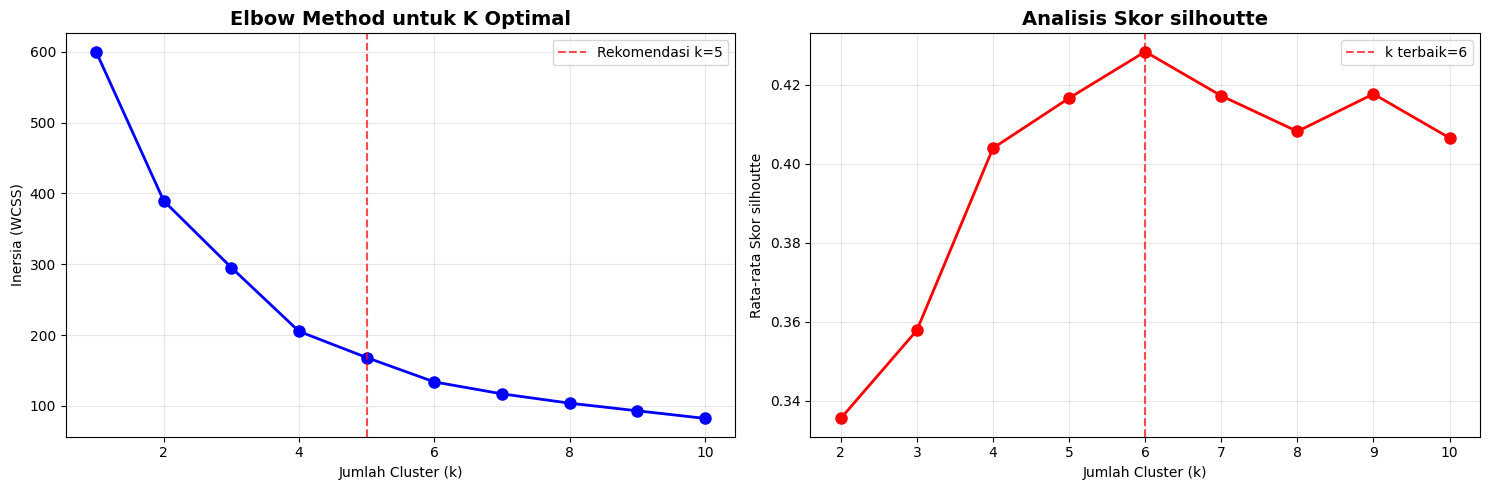


Analisis:
• Metode Siku menyarankan k=5 sebagai pilihan yang baik.
• Skor silhoutte tertinggi dicapai pada k=6.
• Skor silhoutte untuk k=5 adalah: 0.417
• Skor silhoutte maksimum adalah: 0.428 pada k=6

Menggunakan k=5 cluster untuk model final.


In [ ]:
# Data Prep untuk clustering
X = df_standard[numerical_features]

# Elbow Method & Analisis silhoutte
# Mencoba nilai k dari 1 hingga 10 untuk melihat mana yang terbaik.
k_range = range(1, 11)
inersia = []
skor_silhoutte = []

print("Menghitung jumlah cluster optimal")
print("K\tInersia\t\tSkor silhoutte")

# Melakukan iterasi untuk setiap nilai k
for k in k_range:
    # Membuat model KMeans dengan jumlah cluster k
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    inersia.append(kmeans.inertia_)
    
    if k > 1:
        avg_silhoutte = silhouette_score(X, kmeans.labels_)
        skor_silhoutte.append(avg_silhoutte)
        print(f"{k}\t{kmeans.inertia_:.2f}\t\t{avg_silhoutte:.3f}")
    else:
        skor_silhoutte.append(0) 
        print(f"{k}\t{kmeans.inertia_:.2f}\t\tN/A")

# Visualisasi Hasil
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Plot Elbow Method
# Membuat plot garis yang menghubungkan nilai k dengan inersianya
ax1.plot(k_range, inersia, 'bo-', linewidth=2, markersize=8)
ax1.set_title('Elbow Method untuk K Optimal', fontsize=14, fontweight='bold')
ax1.set_xlabel('Jumlah Cluster (k)')
ax1.set_ylabel('Inersia (WCSS)')
ax1.grid(True, alpha=0.3)

# Menandai titik "siku" yang diidentifikasi secara visual
ax1.axvline(x=5, color='red', linestyle='--', alpha=0.7, label='Rekomendasi k=5')
ax1.legend()

# Plot Analisis silhoutte
# Membuat plot garis yang menghubungkan nilai k dengan skor siluet rata-ratanya
ax2.plot(range(2, 11), skor_silhoutte[1:], 'ro-', linewidth=2, markersize=8)
ax2.set_title('Analisis Skor silhoutte', fontsize=14, fontweight='bold')
ax2.set_xlabel('Jumlah Cluster (k)')
ax2.set_ylabel('Rata-rata Skor silhoutte')
ax2.grid(True, alpha=0.3)

# Mencari nilai k dengan skor siluet tertinggi
best_k = skor_silhoutte[1:].index(max(skor_silhoutte[1:])) + 2
ax2.axvline(x=best_k, color='red', linestyle='--', alpha=0.7, label=f'k terbaik={best_k}')
ax2.legend()

plt.tight_layout()
plt.show()

# Analisis dan Rekomendasi
# Mencetak kesimpulan dari kedua metode
print(f"\nAnalisis:")
print(f"• Metode Siku menyarankan k=5 sebagai pilihan yang baik.")
print(f"• Skor silhoutte tertinggi dicapai pada k={best_k}.")
print(f"• Skor silhoutte untuk k=5 adalah: {skor_silhoutte[4]:.3f}")
print(f"• Skor silhoutte maksimum adalah: {max(skor_silhoutte[1:]):.3f} pada k={best_k}")

# Karena k=5 menunjukkan titik siku yang jelas dan memiliki skor silhoutte yang tinggi,
k_optimal = 5
print(f"\nMenggunakan k={k_optimal} cluster untuk model final.")

**Interpretasi Hasil**

- Elbow Method: Grafik menunjukkan "siku" atau patahan yang paling jelas pada K=5. Setelah titik ini, penurunan nilai inersia tidak lagi signifikan.
- Silhouette Score: Skor siluet tertinggi dicapai pada K=6 (0.428), namun skor untuk K=5 juga sangat kompetitif (0.417).
- Keputusan: Dengan mempertimbangkan patahan yang jelas pada Metode Siku dan skor siluet yang tinggi, K=5 dipilih sebagai jumlah cluster yang optimal karena memberikan keseimbangan terbaik antara kohesi intra-cluster dan separasi antar-cluster.

## 6. Customer Segmentation with K-Means 

In [21]:
# Model Training,  K-Means dengan k=5
# random_state=42 digunakan agar hasil clustering konsisten setiap kali kode dijalankan
# n_init=10 untuk menjalankan algoritma 10 kali dan memilih hasil terbaik
kmeans_final = KMeans(n_clusters=k_optimal, random_state=42, n_init=10)
label_kluster = kmeans_final.fit_predict(X)

# Menambahkan label cluster ke dataframe asli dan yang sudah dinormalisasi
df['Cluster'] = label_kluster
df_standard['Cluster'] = label_kluster

# Menampilkan ringkasan hasil clustering
print(f"Hasil Clustering K-Means (k={k_optimal}):")
print(f"Jumlah pelanggan di setiap cluster:")
kluster_counts = df['Cluster'].value_counts().sort_index()
for cluster, count in kluster_counts.items():
    print(f"Cluster {cluster}: {count} pelanggan ({count/len(df)*100:.1f}%)")

print(f"\nSkor Siluet Final: {silhouette_score(X, label_kluster):.3f}")

# Visualisasi Hasil Clustering
# Plot Sebaran: Pendapatan Tahunan vs. Skor Pengeluaran (Paling Relevan)
fig1 = px.scatter(df, 
                  x='Annual Income (k$)', 
                  y='Spending Score (1-100)',
                  color='Cluster',
                  title='<b>Segmentasi Pelanggan: Pendapatan vs. Skor Pengeluaran</b>',
                  labels={'Annual Income (k$)': 'Pendapatan Tahunan (k$)', 'Spending Score (1-100)': 'Skor Pengeluaran'},
                  hover_data=['CustomerID', 'Age', 'Gender']) 
fig1.show()

# Plot Sebaran: Menggabungkan Usia, Pendapatan, dan Skor Pengeluaran
fig2 = px.scatter_3d(df,
                     x='Age',
                     y='Annual Income (k$)',
                     z='Spending Score (1-100)',
                     color='Cluster',
                     title='<b>Visualisasi Cluster 3D</b>',
                     labels={'Age': 'Usia', 'Annual Income (k$)': 'Pendapatan Tahunan (k$)', 'Spending Score (1-100)': 'Skor Pengeluaran'},
                     hover_data=['CustomerID', 'Gender'])
fig2.show()

# Diagram Lingkaran (Pie Chart): Distribusi Ukuran Cluster
pie_data = kluster_counts.reset_index()
pie_data.columns = ['Cluster', 'Jumlah']
fig3 = px.pie(pie_data,
              values='Jumlah',
              names='Cluster',
              title='<b>Distribusi Pelanggan Berdasarkan Cluster</b>',
              color='Cluster',
              hole=0.3) 
fig3.show()

# Histogram: Distribusi Usia untuk Setiap Cluster
fig4 = px.histogram(df,
                    x='Age',
                    color='Cluster',
                    marginal='box',
                    title='<b>Distribusi Usia Berdasarkan Cluster</b>',
                    labels={'Age': 'Usia'})
fig4.show()


# Kesimpulan Akhir
print(f"\nProses clustering selesai! Pelanggan telah disegmentasi menjadi {k_optimal} kelompok yang berbeda.")
print(f"Clustering K-Means berhasil dengan skor siluet: {silhouette_score(X, label_kluster):.3f}")
print(f"Visualisasi interaktif menunjukkan pemisahan cluster yang jelas di berbagai kombinasi fitur.")

Hasil Clustering K-Means (k=5):
Jumlah pelanggan di setiap cluster:
Cluster 0: 20 pelanggan (10.0%)
Cluster 1: 54 pelanggan (27.0%)
Cluster 2: 40 pelanggan (20.0%)
Cluster 3: 39 pelanggan (19.5%)
Cluster 4: 47 pelanggan (23.5%)

Skor Siluet Final: 0.417



Proses clustering selesai! Pelanggan telah disegmentasi menjadi 5 kelompok yang berbeda.
Clustering K-Means berhasil dengan skor siluet: 0.417
Visualisasi interaktif menunjukkan pemisahan cluster yang jelas di berbagai kombinasi fitur.


**Interpretasi Hasil**
- Visualisasi menunjukkan bahwa cluster-cluster tersebut memiliki pemisahan yang jelas, terutama pada dimensi Pendapatan Tahunan dan Skor Pengeluaran.
- Visualisasi mengonfirmasi bahwa cluster-cluster ini juga memiliki perbedaan karakteristik dalam hal Usia.

## 7. Cluster Profiling 

In [20]:
print("PROFILING CLUSTER PELANGGAN")

# Menghitung statistik deskriptif untuk setiap cluster
profil_kluster = df.groupby('Cluster')[numerical_features + ['CustomerID']].agg({
    'Age': ['mean', 'std', 'min', 'max'],
    'Annual Income (k$)': ['mean', 'std', 'min', 'max'],
    'Spending Score (1-100)': ['mean', 'std', 'min', 'max'],
    'CustomerID': 'count'
}).round(2)

# Merapikan nama kolom hasil agregasi agar lebih mudah dibaca
profil_kluster.columns = ['_'.join(col).strip() for col in profil_kluster.columns]
profil_kluster = profil_kluster.rename(columns={'CustomerID_count': 'Jumlah_Pelanggan'})

print("Statistik per Cluster:")
print(profil_kluster)


# Analisis Karakteristik dan Pemberian Nama Persona untuk Setiap Cluster
print(f"\nINSIGHT & REKOMENDASI BISNIS PER CLUSTER:")

nama_kluster = []
# Melakukan iterasi dari cluster 0 hingga 4
for cluster in range(k_optimal):
    # Mengambil data untuk cluster saat ini
    cluster_data = df[df['Cluster'] == cluster]
    
    # Menghitung nilai rata-rata
    avg_age = cluster_data['Age'].mean()
    avg_income = cluster_data['Annual Income (k$)'].mean()
    avg_spending = cluster_data['Spending Score (1-100)'].mean()
    count = len(cluster_data)
    
    # Menghitung distribusi gender dalam cluster
    gender_dist = cluster_data['Gender'].value_counts()
    dominant_gender = gender_dist.index[0]
    gender_ratio = gender_dist.iloc[0] / count * 100
    
    # Logika untuk memberikan nama dan strategi berdasarkan karakteristik
    if avg_income > 70 and avg_spending > 70:
        name = "Pelanggan Premium"
        strategy = "Tawarkan produk mewah, layanan eksklusif, dan program VIP."
    elif avg_income > 70 and avg_spending < 40:
        name = "Rich Konservatif"
        strategy = "Fokus pada kualitas, jaminan, dan edukasi nilai produk."
    elif avg_income < 40 and avg_spending < 40:
        name = "Hemat"
        strategy = "Targetkan dengan diskon, penawaran paket (bundling), dan produk bernilai tinggi."
    elif avg_age < 40:
        name = "Pelanggan Muda"
        strategy = "Gunakan promosi tren, media sosial, dan program loyalitas."
    else:
        name = "Pelanggan Menengah Senior"
        strategy = "Tawarkan produk yang relevan dengan gaya hidup mereka dan berikan layanan yang nyaman."
    
    nama_kluster.append(name)
    
    # Mencetak profil lengkap untuk setiap cluster
    print(f"\nCLUSTER {cluster} - '{name}'")
    print(f"   Ukuran: {count} pelanggan ({count/len(df)*100:.1f}% dari total)")
    print(f"   Demografi: Dominan {dominant_gender} ({gender_ratio:.0f}%)")
    print(f"   Rata-rata Usia: {avg_age:.1f} tahun")
    print(f"   Rata-rata Pendapatan: ${avg_income:.0f}k per tahun")
    print(f"   Rata-rata Skor Pengeluaran: {avg_spending:.1f}/100")
    print(f"   Strategi Bisnis: {strategy}")

# Visualisasi Profiling Cluster
# Bar Chart untuk Perbandingan Rata-rata Fitur per Cluster
metrics = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
cluster_means = df.groupby('Cluster')[metrics].mean().reset_index()

cluster_means_melted = cluster_means.melt(id_vars='Cluster', var_name='Metrik', value_name='Rata-rata')

fig_bar = px.bar(cluster_means_melted,
                 x='Cluster',
                 y='Rata-rata',
                 color='Cluster',
                 facet_col='Metrik',
                 title='<b>Perbandingan Rata-rata Karakteristik per Cluster</b>',
                 labels={'Rata-rata': 'Nilai Rata-rata', 'Cluster': 'Nomor Cluster'},
                 text='Rata-rata')

fig_bar.update_traces(texttemplate='%{text:.0f}', textposition='outside')
fig_bar.update_yaxes(matches=None) 
fig_bar.show()


# Pie Chart untuk Distribusi Ukuran Cluster
fig_pie = px.pie(kluster_counts.reset_index(),
                 values='count',
                 names=kluster_counts.index.map(lambda i: f'Cluster {i}<br>({nama_kluster[i]})'),
                 title='<b>Distribusi Pelanggan Berdasarkan Cluster</b>',
                 hole=0.3)

fig_pie.update_traces(textposition='inside', textinfo='percent+label')
fig_pie.show()


# Kesimpulan Akhir
print(f"\nAnalisis segmentasi pelanggan selesai!")
print(f"Ringkasan: {len(df)} pelanggan berhasil disegmentasi menjadi {k_optimal} kelompok yang berbeda.")
print(f"Setiap cluster memiliki karakteristik unik yang cocok untuk strategi pemasaran yang tertarget.")

PROFILING CLUSTER PELANGGAN
Statistik per Cluster:
         Age_mean  Age_std  Age_min  Age_max  Annual Income (k$)_mean  \
Cluster                                                                 
0           46.25    11.58       20       67                    26.75   
1           25.19     5.51       18       38                    41.09   
2           32.88     3.86       27       40                    86.10   
3           39.87    10.94       19       59                    86.10   
4           55.64     8.91       40       70                    54.38   

         Annual Income (k$)_std  Annual Income (k$)_min  \
Cluster                                                   
0                          7.31                      16   
1                         16.82                      15   
2                         16.34                      69   
3                         16.73                      64   
4                          8.82                      38   

         Annual Income 


Analisis segmentasi pelanggan selesai!
Ringkasan: 200 pelanggan berhasil disegmentasi menjadi 5 kelompok yang berbeda.
Setiap cluster memiliki karakteristik unik yang cocok untuk strategi pemasaran yang tertarget.


**Interpretasi Hasil**

Cluster 0: Pelanggan Hemat

- Karakteristik: Terdiri dari 20 pelanggan (10.0%) dengan pendapatan tahunan rendah (rata-rata $27k) dan skor pengeluaran yang juga rendah (18.4). Usia rata-rata cenderung lebih tua (46.2 tahun).
- Persona: Kelompok yang sangat sadar anggaran dan berhati-hati dalam berbelanja.

Cluster 1: Pelanggan Muda & Potensial

- Karakteristik: Segmen terbesar dengan 54 pelanggan (27.0%). Mereka berusia muda (rata-rata 25.2 tahun) dengan pendapatan menengah ($41k) namun memiliki skor pengeluaran yang cukup tinggi (62.2).
- Persona: Generasi muda yang antusias berbelanja dan mengikuti tren, meskipun daya belinya belum maksimal.

Cluster 2: Pelanggan Premium

- Karakteristik: Terdiri dari 40 pelanggan (20.0%) dengan pendapatan sangat tinggi (rata-rata $86k) dan skor pengeluaran sangat tinggi (81.5). Usia mereka relatif muda hingga dewasa (rata-rata 32.9 tahun).
- Persona: Segmen ideal yang memiliki daya beli tinggi dan kemauan tinggi untuk berbelanja. Mereka adalah target utama untuk produk-produk premium.

Cluster 3: Pelanggan Berpenghasilan Tinggi & Konservatif

- Karakteristik: Terdiri dari 39 pelanggan (19.5%) yang memiliki pendapatan tinggi (rata-rata $86k) namun skor pengeluarannya sangat rendah (19.4).
- Persona: Kelompok yang memiliki kemampuan finansial tinggi tetapi sangat selektif dan hemat dalam berbelanja.

Cluster 4: Pelanggan Standar & Loyal

- Karakteristik: Segmen ini berisi 47 pelanggan (23.5%) dengan usia lebih senior (rata-rata 55.6 tahun), pendapatan menengah ($54k), dan skor pengeluaran yang juga moderat (48.9).
- Persona: Pelanggan mapan yang rutin berbelanja, tidak terlalu impulsif, dan kemungkinan besar loyal terhadap merek tertentu.

**Kesimpulan**

Analisis ini mengidentifikasi lima segmen pelanggan yang berbeda secara signifikan. Berdasarkan profil yang telah dibuat, berikut adalah rekomendasi strategi bisnis yang dapat diambil:
1. Untuk Pelanggan Premium (Cluster 2): Fokus pada program loyalitas eksklusif (VIP), penawaran produk mewah, dan pengalaman berbelanja yang personal.
2. Untuk Pelanggan Muda & Potensial (Cluster 1): Gunakan kampanye pemasaran digital melalui media sosial, tawarkan produk yang sedang tren, dan program loyalitas berbasis poin untuk mendorong pembelian berulang.
3. Untuk Pelanggan Berpenghasilan Tinggi & Konservatif (Cluster 3): Lakukan pendekatan yang berfokus pada kualitas, daya tahan, dan nilai investasi produk. Pemasaran harus menekankan keunggulan teknis dan jaminan purna jual.
4. Untuk Pelanggan Standar & Loyal (Cluster 4): Pertahankan loyalitas mereka dengan penawaran yang konsisten, layanan pelanggan yang baik, dan produk yang sesuai dengan kebutuhan gaya hidup mereka.
5. Untuk Pelanggan Hemat (Cluster 0): Targetkan dengan promosi diskon, program clearance sale, dan penawaran bundling untuk memberikan persepsi nilai tambah.

### The 5 Customer Segments Discovered:

| Cluster | Name | Size | Karakteristik | Marketing Strategy |
|---------|------|------|-------------------|-------------------|
| **0** | Pelanggan Hemat | 20 (10%) | Usia cenderung senior, pendapatan dan skor pengeluaran sangat rendah. | Targetkan dengan promosi diskon, penawaran bundling, dan produk bernilai tinggi. |
| **1** | Pelanggan Muda & Potensial | 54 (27%) | Usia muda, pendapatan menengah, namun skor pengeluaran tinggi. | Fokus pada kampanye media sosial, produk yang sedang tren, dan program loyalitas berbasis poin. |
| **2** | Pelanggan Premium | 40 (20%) | Usia muda hingga dewasa, pendapatan dan skor pengeluaran sangat tinggi. | Tawarkan produk mewah, layanan eksklusif (VIP), dan pengalaman berbelanja yang personal. |
| **3** | Pelanggan Berpenghasilan Tinggi & Konservatif | 39 (19.5%) | Usia dewasa, pendapatan sangat tinggi, namun skor pengeluaran sangat rendah. | Lakukan pemasaran yang berfokus pada kualitas, jaminan produk, dan edukasi nilai investasi barang. |
| **4** | Pelanggan Standar & Loyal | 47 (23.5%) | Usia senior, pendapatan dan skor pengeluaran pada tingkat menengah. | Pertahankan loyalitas melalui layanan pelanggan yang baik dan penawaran produk yang konsisten. |
